<a href="https://colab.research.google.com/github/satyashree806/Customer_Classification_Prediction/blob/main/Airtel_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("/content/archive.zip")


ValueError: Mountpoint must either be a directory or not exist

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df = df.dropna()


In [9]:
# Define features and target
X = df.drop(columns=['Date', 'Close Price'])
y = df['Close Price']


In [10]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [12]:
# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [13]:
# Predict on the test set
y_pred = model.predict(X_test)


In [14]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.4f}")


Mean Squared Error: 6.66
R^2 Score: 0.9988


In [15]:
# Feature importance
feature_names = X.columns
importances = model.feature_importances_
feature_importance_df = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("\nFeature Importances:")
print(feature_importance_df)


Feature Importances:
WAP                          0.943649
High Price                   0.048490
Low Price                    0.006704
Spread Close-Open            0.000637
Open Price                   0.000123
Spread High-Low              0.000099
% Deli. Qty to Traded Qty    0.000081
No. of Trades                0.000072
Deliverable Quantity         0.000059
Total Turnover (Rs.)         0.000044
No.of Shares                 0.000043
dtype: float64


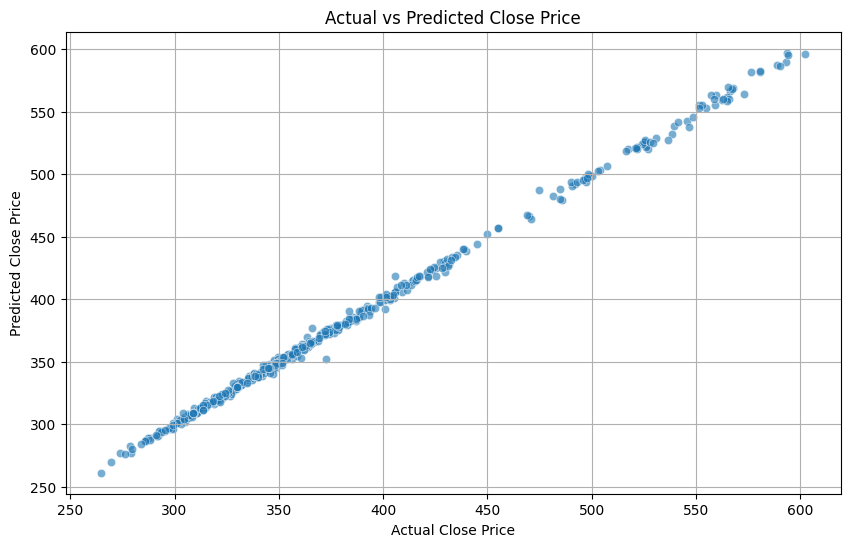

In [16]:
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Price")
plt.grid(True)
plt.show()